In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data = [25, 30, 22, 27, 24, 28, 31, 29, 26, 90]
np_data = np.array(data)
nan_data = [25, 30, 22, 27, 24, 28, 31, 29, 26, math.nan, 90]
pd_nan_data = pd.Series(nan_data)


## Variance:
### According to Bessel's correction the sample variance
### $ \sigma^2 = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - mean(x))^2$
### where x_i is the ith element of the dataset x with n elements
### (for calculating the population variance replace n-1 with n)

In [23]:
mean1 = sum(data) / len(data) 
variance = sum((item-mean1)**2 for item in data) / (len(data) - 1 )


#the variance function of the statistics module allows you to provide your own mean to the formula

variance, statistics.variance(data, mean1), statistics.pvariance(data) 

(405.9555555555556, 405.9555555555556, 365.36)

In [24]:
#in numpy ddof (delta degrees of freedom) will replace n with n-1 in the formula

np.var(data, ddof=1), np_data.var(ddof=1), np.var(data)

(405.9555555555556, 405.9555555555556, 365.36)

In [25]:
#dealing with nan values in your data

statistics.variance(nan_data), np.var(nan_data, ddof=1), np.nanvar(nan_data, ddof=1)

(nan, nan, 405.9555555555556)

In [26]:
#pd.Series.var will have ddof=1 by default and skips nan values

pd_nan_data.var(ddof=0),  pd_nan_data.var(skipna=False)

(365.36, nan)

-----------

In [27]:
#The sample standart Deviation s is the positive square root of the sample variance s²

standard_deviation = variance ** 0.5

standard_deviation, statistics.stdev(data)

(20.148338779054605, 20.148338779054605)

In [28]:
np.std(data, ddof=1), np_data.std(ddof=1), np.nanstd(data, ddof=1)

(20.148338779054605, 20.148338779054605, 20.148338779054605)

In [29]:
#pd.Series same behaviour as before

pd_nan_data.std(),  pd_nan_data.std(skipna=False)

(20.148338779054605, nan)

In [30]:
#for the population standart deviation

statistics.pstdev(data), np.std(data), pd_nan_data.std() 

(19.114392483152585, 19.114392483152585, 20.148338779054605)

-------

In [31]:
n = len(data)
mean = sum(data) / n
std = np.var(data, ddof=1) ** 0.5

In [32]:
#the skewness measures the symmetry of your data, there are serveral mathematical definitions for
#calculating skewness. When Skewness values are close to 0, 
#then the dataset is considered  to be quite symmetrical

skw = (sum((item - mean1)**3 for item in data) *  n / ((n - 1) * (n - 2) * std**3))

skw, scipy.stats.skew(data,bias=False),  scipy.stats.skew(nan_data,bias=False, nan_policy='omit')

(3.0504698806777566, 3.0504698806777566, 3.0504698806777566)

In [33]:
#pandas Series method

pd_data = pd.Series(data)
pd_data.skew()

3.050469880677756

-------

In [34]:
#I am importing my  function boxplot here to take a closer look at quantiles
from boxplot import boxplot2

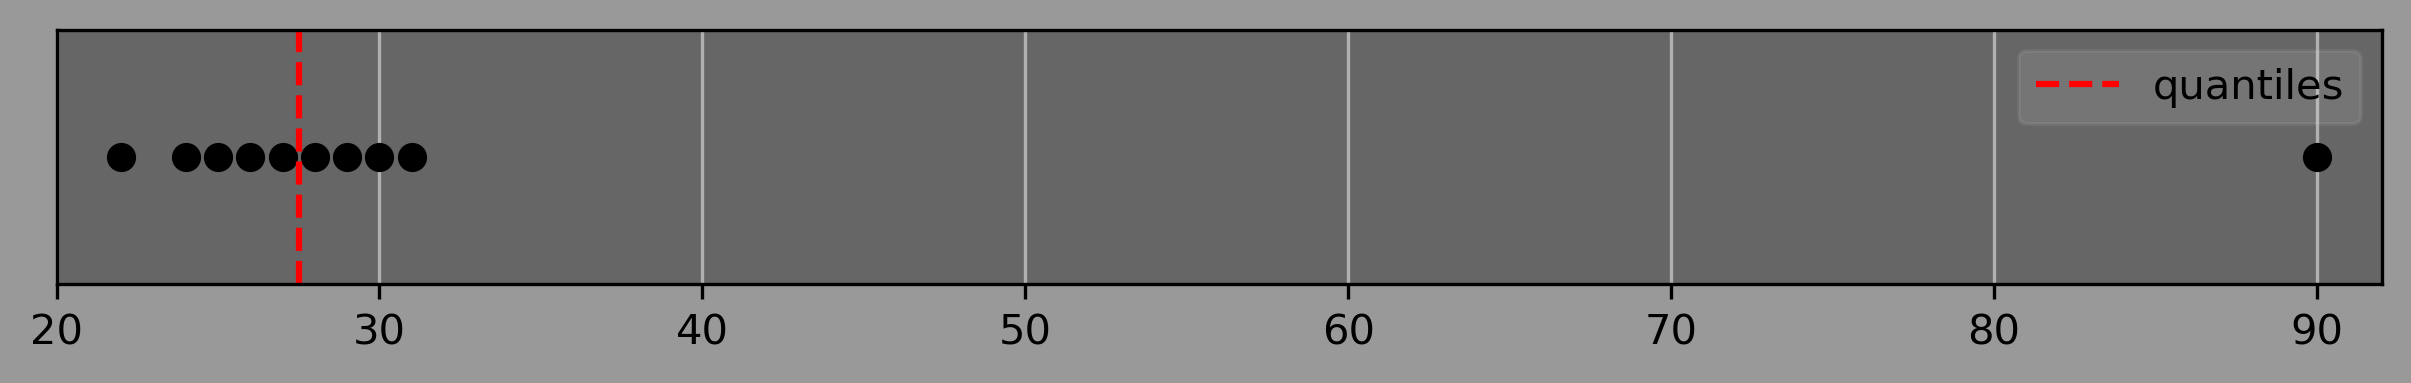

[27.5]


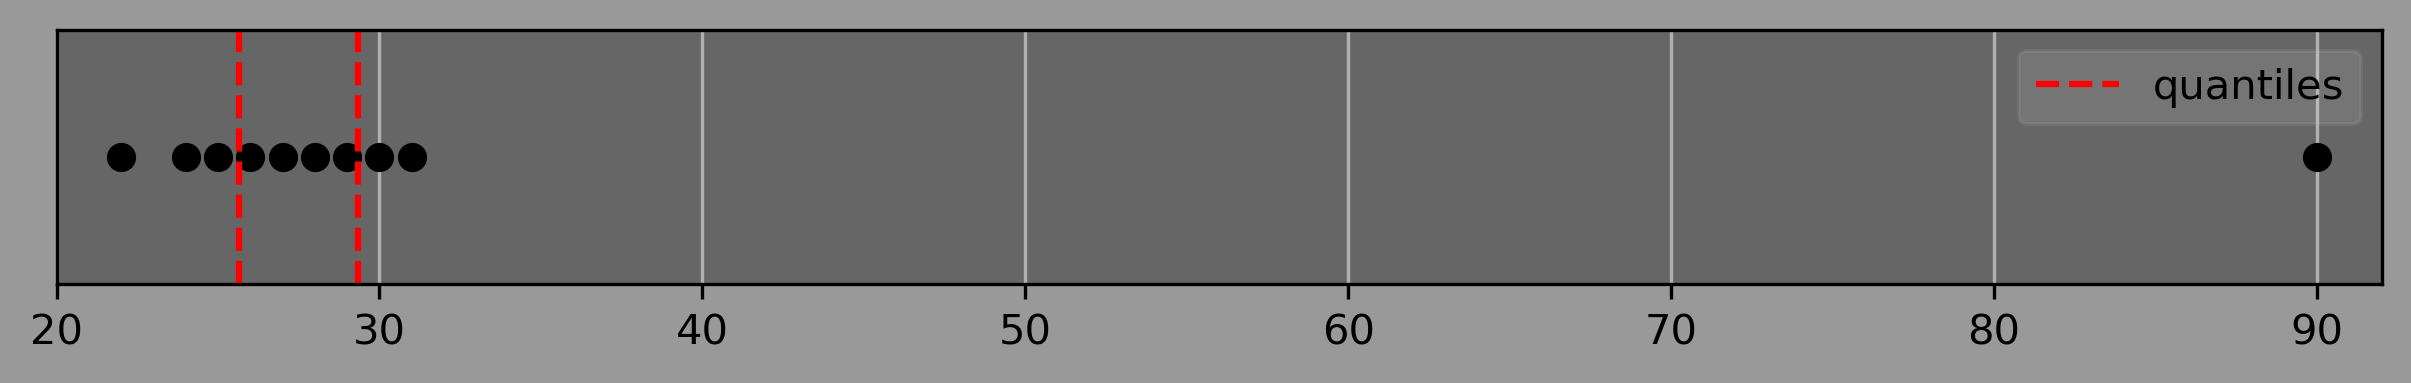

[25.666666666666668, 29.333333333333332]


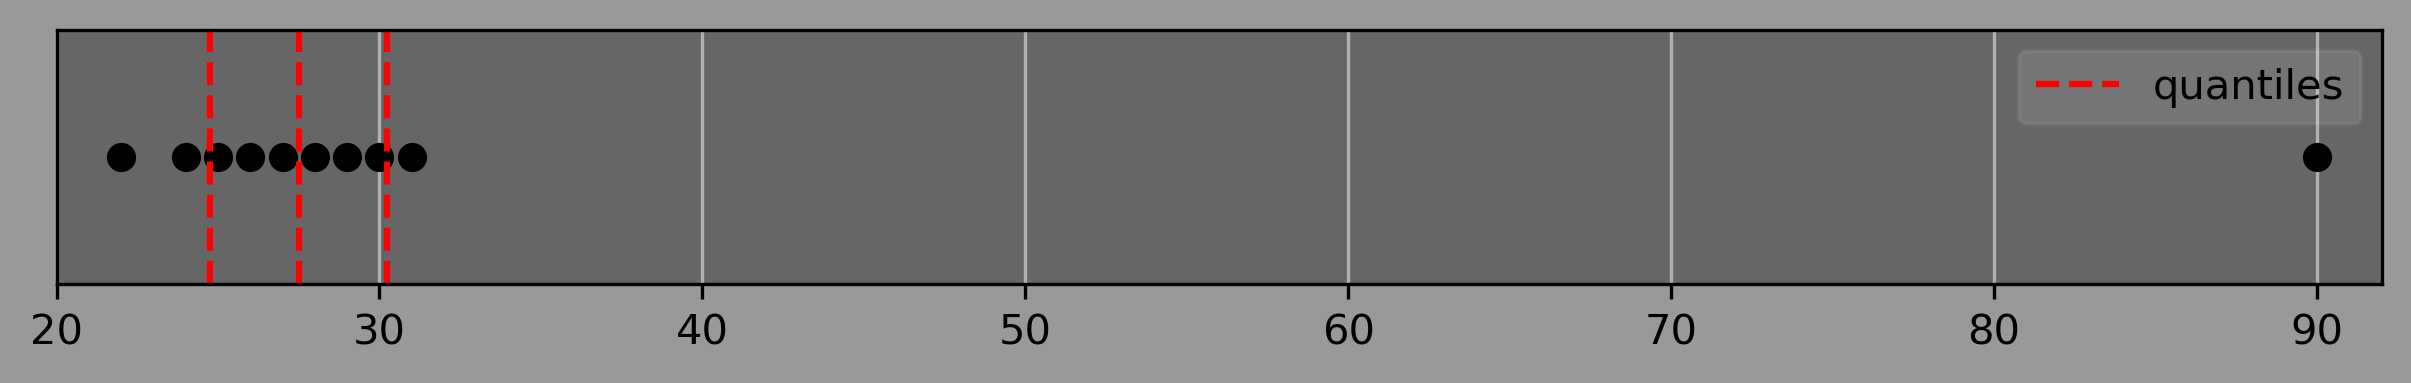

[24.75, 27.5, 30.25]


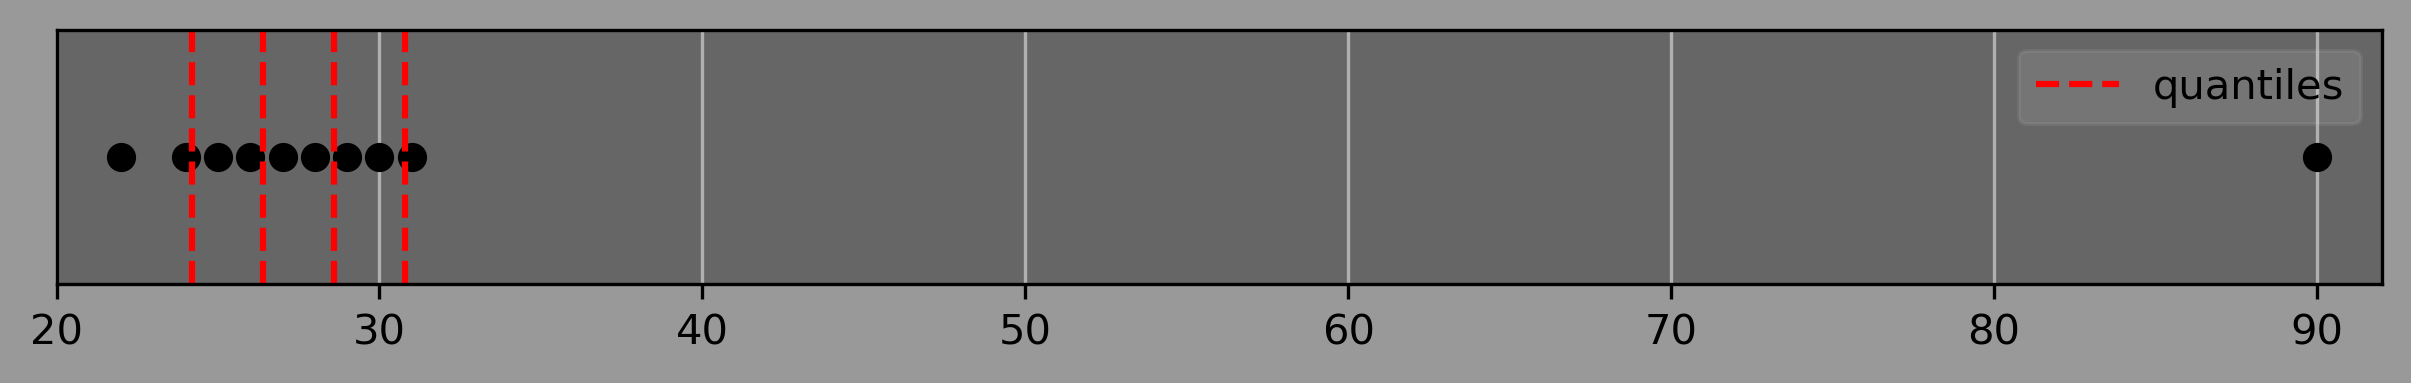

[24.2, 26.4, 28.6, 30.8]


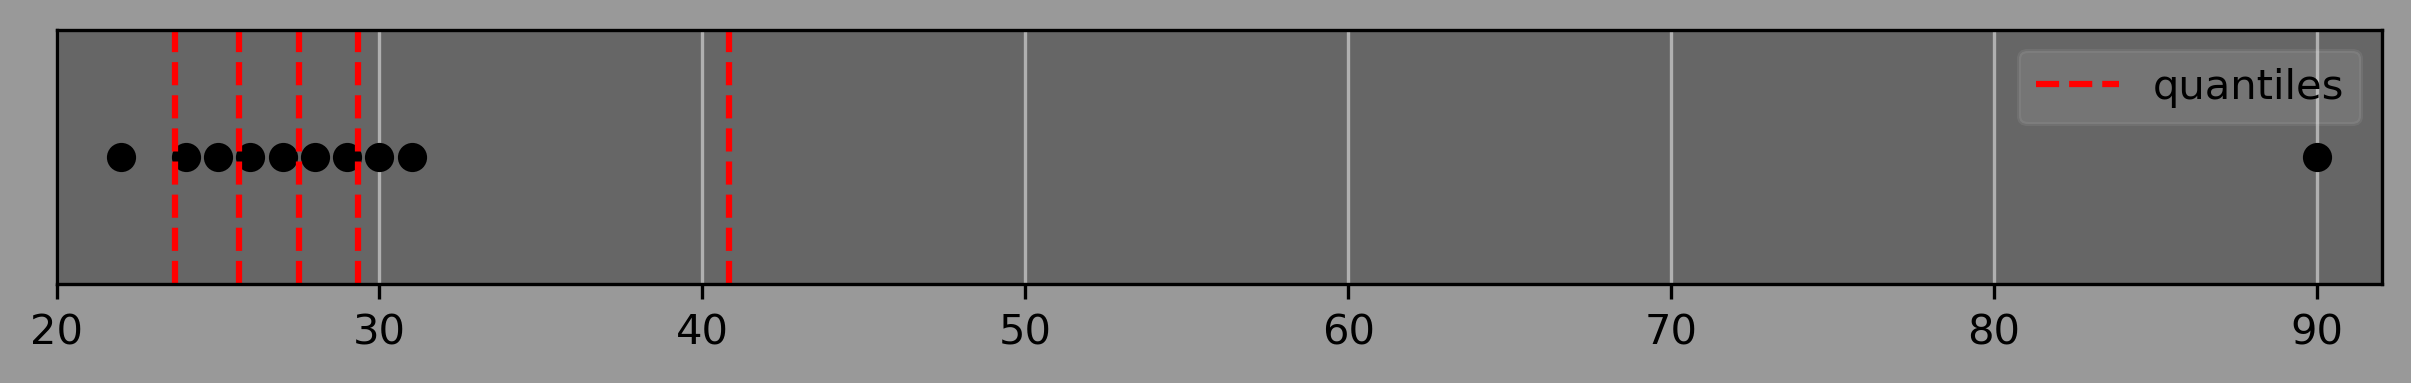

[23.666666666666668, 25.666666666666668, 27.5, 29.333333333333332, 40.833333333333336]


In [35]:
for i in range(2,7):
    boxplot2(data,'quantil',i), print(statistics.quantiles(data,n=i))

In [36]:
np.percentile(data,10), np.percentile(data,95)

(23.8, 63.44999999999994)

In [37]:
np.percentile(data,[25,50,75]), np.median(data), np.nanpercentile(nan_data,10)

(array([25.25, 27.5 , 29.75]), 27.5, 23.8)

In [38]:
scipy.stats.describe(data, bias=False)

DescribeResult(nobs=10, minmax=(22, 90), mean=33.2, variance=405.9555555555556, skewness=3.0504698806777566, kurtosis=9.48883280904523)